There is currently a conflict ongoing between Russia and Ukraine which has been happening for many days now. Other nations have shown support for Ukraine through the implementation of economic sanctions against Russia. People have been using social media, particularly Twitter, to share their thoughts and experiences related to the war, as well as expressing support for one side or the other. In this project, we will go through a process using Python to analyze the sentiment of Twitter users regarding the war between Russia and Ukraine.

## Ukraine Russia War Twitter Sentiment Analysis using Python
The dataset that I am using for the task of Twitter sentiment analysis on the Ukraine and Russia War is downloaded from Kaggle. This dataset was initially collected from Twitter and is updated regularly. You can download this dataset from https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated?select=filename.csv. Now let’s import the necessary Python libraries and the dataset to get started with this task:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [3]:
data = pd.read_csv("/content/drive/MyDrive/filename/filename.csv.zip")
print(data.head())

                    id      conversation_id               created_at  \
0  1611525657535877122  1611118184198701056  2023-01-07 00:50:32 UTC   
1  1611525639974141956  1611524639360155648  2023-01-07 00:50:27 UTC   
2  1611525638648913921  1611525638648913921  2023-01-07 00:50:27 UTC   
3  1611525624098689026  1610862177547583488  2023-01-07 00:50:24 UTC   
4  1611525611813588993  1611493200383950849  2023-01-07 00:50:21 UTC   

         date      time  timezone              user_id       username  \
0  2023-01-07  00:50:32         0  1499938008270655490        xardalu   
1  2023-01-07  00:50:27         0             68229976    katariiinak   
2  2023-01-07  00:50:27         0            573358635       vergemma   
3  2023-01-07  00:50:24         0  1503899896956571651  billdollars77   
4  2023-01-07  00:50:21         0  1029489969885261832     jim_dorsch   

                name place  ... geo source user_rt_id user_rt retweet_id  \
0            SlavaUA   NaN  ... NaN    NaN        Na

Let’s have a quick look at all the column names of the dataset:

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [5]:
data = data[["username", "tweet", "language"]]

Let’s have a look at whether any of these columns contains any null values or not:

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:

In [7]:
data["language"].value_counts()

en     8862
pt      311
it      214
qme     100
in       97
und      51
ru       49
es       49
de       39
ca       36
fr       24
ja       22
th       20
fi       14
qht      13
et       12
pl       12
nl       11
ro        8
uk        7
no        6
tl        5
cy        5
vi        4
qam       4
bn        4
da        3
tr        3
cs        3
hi        3
zxx       2
el        2
ne        1
ur        1
ht        1
sv        1
ar        1
lv        1
lt        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

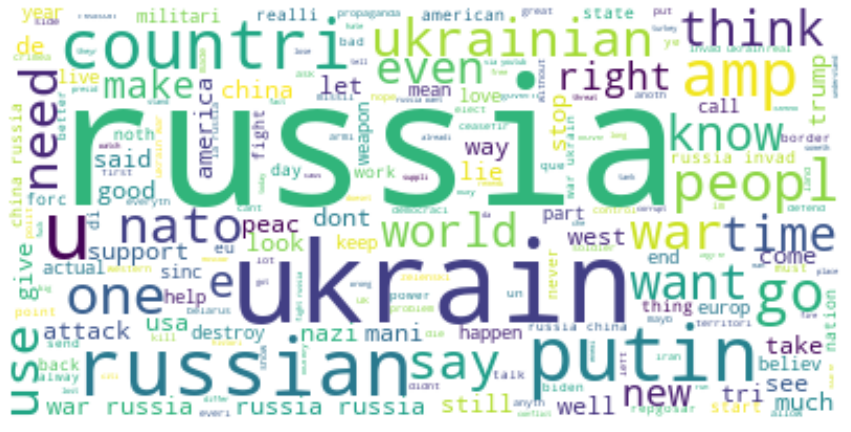

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0   drvnkunclez fascist ruzzian ukrainian occupi ...     0.000     0.520   
1  kride extrem embarrass finnish media take russ...     0.000     0.180   
2  apolog presid russia call war crimin fake mart...     0.000     0.219   
3   techlozeng rememb hear use willi pete  thermi...     0.000     0.346   
4  gerashchenkoen care pure evil sooner gone bett...     0.377     0.190   

   Neutral  
0    0.480  
1    0.820  
2    0.781  
3    0.654  
4    0.433  


Now let’s have a look at the most frequent words used by people with positive sentiments:

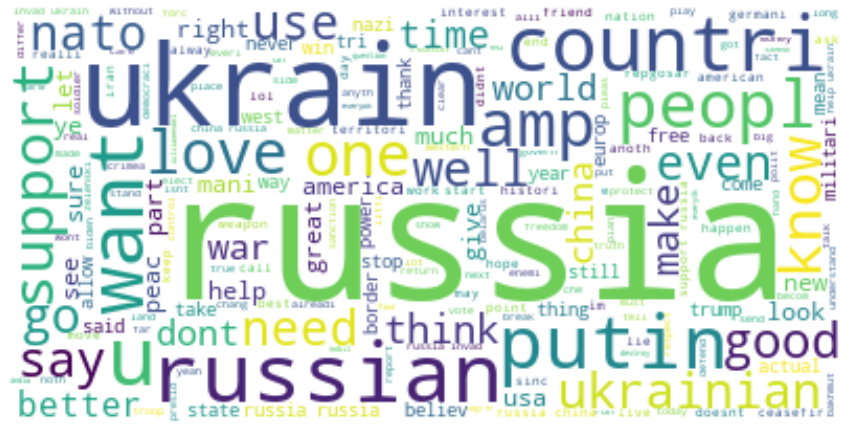

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

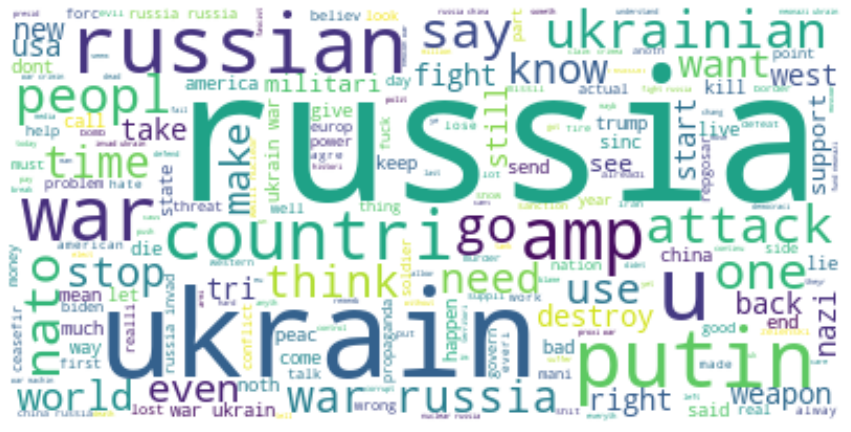

In [12]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So this is how you can analyze the sentiments of people over the Ukraine and Russia war. I hope this war gets over soon and things get back to normal.

## Summary

There has been a significant amount of discussion on Twitter about the ongoing conflict between Ukraine and Russia. These tweets often include information about the situation on the ground, personal opinions and feelings about the conflict, and declarations of support for one side or the other. For the purpose of analyzing the sentiment of Twitter users regarding the Ukraine and Russia war, a collection of these tweets was gathered and used as the basis for the analysis.



